# Image exploration

In [1]:
import os
import numpy as np
import skimage
import skimage.color
import skimage.feature
import skimage.exposure
import skimage.restoration
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
def cleanup_plot():
    plt.xlim(80, 420)
    plt.ylim(80, 420)
    plt.axis('off')
    plt.grid(False)

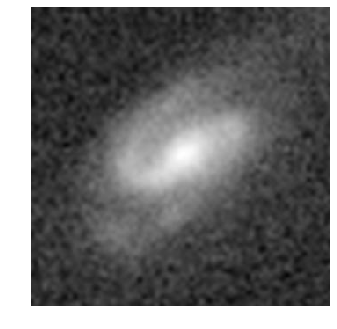

In [3]:
fpath = os.path.join(
    'spiral-aggregation',
    'zooniverse-images',
    'subject-20902077.jpg',
)
im = Image.open(fpath)
im_data = np.array(im) / 255
plt.imshow(im)
cleanup_plot()

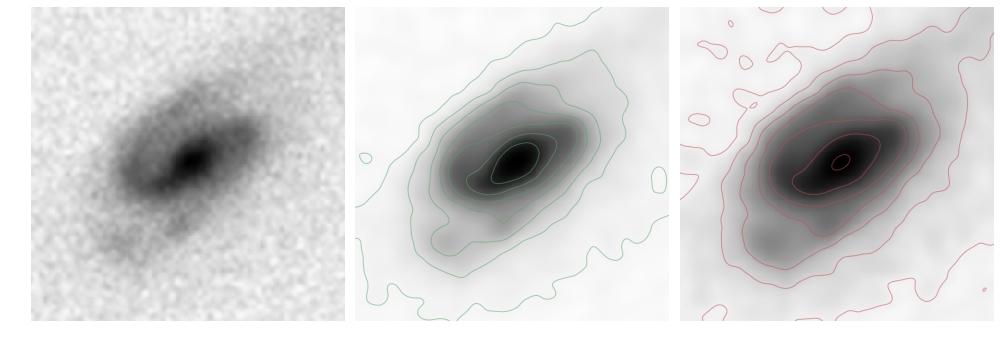

In [4]:
denoised = skimage.restoration.denoise_tv_chambolle(im_data.clip(0, 0.9), weight=0.9, multichannel=False)
gamma_corrected = skimage.exposure.adjust_gamma(denoised, 0.3)
fig, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(14, 9))
ax[0].imshow(im_data)
ax[1].imshow(denoised)
ax[2].imshow(gamma_corrected)
# ax[0].contour(im_data, colors='C0', linewidths=1, alpha=0.5)
ax[1].contour(denoised, colors='C1', linewidths=1, alpha=0.5)
ax[2].contour(gamma_corrected, colors='C2', linewidths=1, alpha=0.5)
for a in ax.reshape(-1):
    plt.sca(a)
    cleanup_plot()
plt.tight_layout()

In [5]:
import scipy.stats as st
p = st.gamma.fit(denoised.reshape(-1))

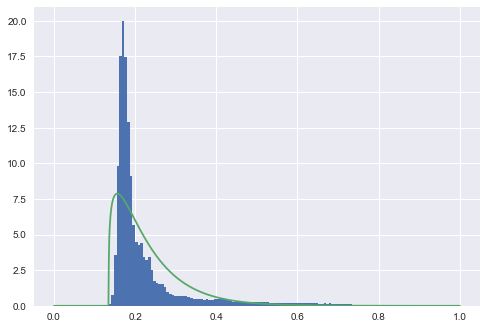

In [9]:
plt.hist(denoised.reshape(-1), bins='scott', density=True);
x = np.linspace(0, 1, 1000)
plt.plot(x, st.gamma.pdf(x, *p), label='gamma: floc=0', c='C1');

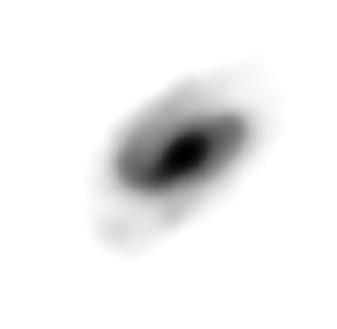

In [12]:
normed_denoised = skimage.exposure.rescale_intensity(denoised, in_range=(0.3, np.max(denoised)))
plt.imshow(normed_denoised)
cleanup_plot()

/Users/tlingard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/tlingard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


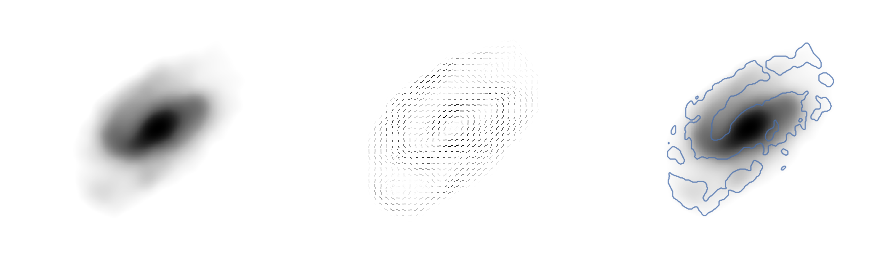

In [13]:
fd, hog_image = skimage.feature.hog(normed_denoised, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(normed_denoised);
cleanup_plot()
plt.subplot(132)
plt.imshow(hog_image_rescaled);
cleanup_plot()
plt.subplot(133)
si = skimage.feature.shape_index(normed_denoised, sigma=2.5)
# select saddle ridges, ridges, domes and caps
m = (si > 1/8) & (si < 1)
plt.imshow(normed_denoised)
plt.contour(m, linewidths=0.4, alpha=0.5, colors='C0')
cleanup_plot()